# Data Preparation

Import all needed packages

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn import metrics 
from scipy.spatial.distance import cdist 
from kmodes.kprototypes import KPrototypes



Import data

In [4]:
#data_folder = Path("/Users/danielcisneros/Documents/The_One_with_All_the_Data/data/")
df = pd.read_csv('../../data/with_rows_removed_addedrows.csv')

df
#df= pd.read_csv('with_rows_removed_addedrows.csv')

,season,episode,title,director,release_date,all_cast,Rating,number_of_reviews,short_summary,writer,...,title_about,gunther,janice,richard,heckles,frank,estelle,ursula,part_1,rat_grouped
0,1,1,The One Where Monica Gets a Roommate,James Burrows,22 September 1994,"['Courteney Cox', 'Matt LeBlanc', 'David Schwi...",8.300000,6579,"Monica and the gang introduce Rachel to the ""r...",David Crane & Marta Kauffman,...,['monica'],0,0,0,0,0,0,0,0,av
1,1,2,The One with the Sonogram at the End,James Burrows,29 September 1994,"['Courteney Cox', 'Matt LeBlanc', 'David Schwi...",8.100000,4953,Ross finds out his ex-wife is pregnant. Rachel...,David Crane & Marta Kauffman,...,other,1,0,0,0,0,0,0,0,below
2,1,3,The One with the Thumb,James Burrows,6 October 1994,"['Courteney Cox', 'Matt LeBlanc', 'David Schwi...",8.200000,4667,Monica becomes irritated when everyone likes h...,Jeffrey Astrof & Mike Sikowitz,...,other,1,0,0,0,0,0,0,0,below
3,1,4,The One with George Stephanopoulos,James Burrows,13 October 1994,"['Courteney Cox', 'Matt LeBlanc', 'David Schwi...",8.100000,4524,Joey and Chandler take Ross to a hockey game t...,Alexa Junge,...,other,1,0,0,0,0,0,0,0,below
4,1,5,The One with the East German Laundry Detergent,Pamela Fryman,20 October 1994,"['Courteney Cox', 'Matt LeBlanc', 'David Schwi...",8.500000,4498,"Eager to spend time with Rachel, Ross pretends...",Jeff Greenstein & Jeff Strauss,...,other,1,1,0,0,0,0,0,0,av
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,10,13,The One Where Joey Speaks French,Gary Halvorson,19 February 2004,"['Courteney Cox', 'Matt LeBlanc', 'David Schwi...",8.500000,3088,Phoebe tries to teach Joey to speak French for...,Sherry Bilsing-Graham & Ellen Plummer,...,['joey'],0,0,0,0,0,0,0,0,av
223,10,14,The One with Princess Consuela,Gary Halvorson,26 February 2004,"['Courteney Cox', 'Matt LeBlanc', 'David Schwi...",8.600000,3032,When Phoebe goes to get her name changed she r...,Robert Carlock & Tracy Reilly,...,other,1,0,0,0,0,0,0,0,av
224,10,15,The One Where Estelle Dies,Gary Halvorson,22 April 2004,"['Courteney Cox', 'Matt LeBlanc', 'David Schwi...",8.500000,2812,Ross tries to get Rachel to go back to Ralph L...,Mark Kunerth & David Crane & Marta Kauffman,...,other,0,1,0,0,0,0,0,0,av
225,10,16,The One with Rachel's Going Away Party,Gary Halvorson,29 April 2004,"['Courteney Cox', 'Matt LeBlanc', 'David Schwi...",8.900000,3189,"The gang throws Rachel a goodbye party, during...",Andrew Reich & Ted Cohen,...,['rachel'],0,0,0,0,0,0,0,0,above


Get Year, Month, and Day variables

In [14]:
df['release_year'] = pd.DatetimeIndex(df['release_date']).year
df['release_month'] = pd.DatetimeIndex(df['release_date']).month
df['release_day'] = pd.DatetimeIndex(df['release_date']).day

Standardizing all variables

In [15]:
df['rating_std']= (df['Rating']-df['Rating'].mean())/df['Rating'].std()
df['views_std']= (df['views']-df['views'].mean())/df['views'].std()
df['number_reviews_std']= (df['number_of_reviews']-df['number_of_reviews'].mean())/df['number_of_reviews'].std()
df['num_guest_stars_std']= (df['num_guest_stars']-df['num_guest_stars'].mean())/df['num_guest_stars'].std()
df['central_perk_loc_std']= (df['central_perk_loc']-df['central_perk_loc'].mean())/df['central_perk_loc'].std()
df['monicas_loc_std']= (df['monicas_loc']-df['monicas_loc'].mean())/df['monicas_loc'].std()
df['chandlers_loc_std']= (df['chandlers_loc']-df['chandlers_loc'].mean())/df['chandlers_loc'].std()
df['ross_loc_std']= (df['ross_loc']-df['ross_loc'].mean())/df['ross_loc'].std()
df['monicas_lines_std']= (df['monicas_lines']-df['monicas_lines'].mean())/df['monicas_lines'].std()
df['rachel_lines_std']= (df['rachel_lines']-df['rachel_lines'].mean())/df['rachel_lines'].std()
df['ross_lines_std']= (df['ross_lines']-df['ross_lines'].mean())/df['ross_lines'].std()
df['phoebe_lines_std']= (df['phoebe_lines']-df['phoebe_lines'].mean())/df['phoebe_lines'].std()
df['joey_lines_std']= (df['joey_lines']-df['joey_lines'].mean())/df['joey_lines'].std()
df['chandler_lines_std']= (df['chandler_lines']-df['chandler_lines'].mean())/df['chandler_lines'].std()
df['all_lines_std']= (df['all_lines']-df['all_lines'].mean())/df['all_lines'].std()
df['season_std']= (df['season']-df['season'].mean())/df['season'].std()
df['episode_std']= (df['episode']-df['episode'].mean())/df['episode'].std()
df['catchphrases_std']= (df['catchphrases']-df['catchphrases'].mean())/df['catchphrases'].std()

Categorical Variables

In [16]:
df['views_cat']=1
df.loc[df['views_std']>.5, 'views_cat']=2
df.loc[df['views_std']<-.5, 'views_cat']=0

In [17]:
df['num_reviews_cat']=1
df.loc[df['number_reviews_std']>.5, 'num_reviews_cat']=2
df.loc[df['number_reviews_std']<-.5, 'num_reviews_cat']=0

In [18]:
df['rating_cat']=0
df.loc[df['rat_grouped']=='av', 'rating_cat']=1
df.loc[df['rat_grouped']=='above', 'rating_cat']=2

In [19]:
df['epi_type_cat']=0
df.loc[df['epi_type']=='reg', 'epi_type_cat']=1
df.loc[df['epi_type']=='fin', 'epi_type_cat']=2

# Elbow Method for Choosing Optimal K for K means

Selecting which features will be modeled

In [20]:
# Features is purely numerical variables
Features= df[['rating_std', 'views_std', 'number_reviews_std','num_guest_stars_std','central_perk_loc_std', 'monicas_loc_std',
       'chandlers_loc_std','ross_loc_std','monicas_lines_std', 'rachel_lines_std', 'ross_lines_std',
       'phoebe_lines_std', 'joey_lines_std', 'chandler_lines_std','all_lines_std']]


The Elbow Method to find optimal K using distortions and inertia

In [21]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) #here you can change the number of k you want to try
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(Features) 
    kmeanModel.fit(Features)     
      
    distortions.append(sum(np.min(cdist(Features, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / Features.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(Features, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / Features.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

Plotting Distortions to find Elbow

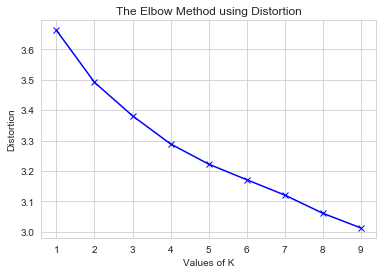

In [22]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

Plotting Inertia to find Elbow

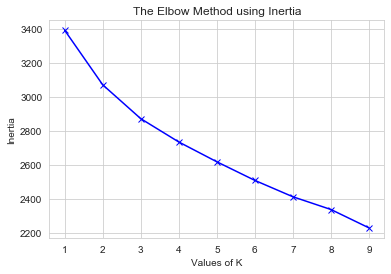

In [23]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

# Fitting the K-means Clustering Model

Fitting the K-Means with K=3

In [24]:
kmeans = KMeans(3, random_state=100)
kmeans.fit(Features)
k_3_clusters = kmeans.predict(Features)
df['cluster_k3']=k_3_clusters

Fitting the K-Means with K=4

In [25]:
kmeans = KMeans(4, random_state=100)
kmeans.fit(Features)
k_4_clusters = kmeans.predict(Features)
df['cluster_k4']=k_4_clusters

# Describing the K-Means K=3 Clusters

In [26]:
print(df['Rating'].groupby(df['cluster_k3']).mean())

cluster_k3
0    8.812838
1    8.326801
2    8.356298
Name: Rating, dtype: float64


In [27]:
df['sub']=0
df.loc[df['cluster_k3']==2, 'sub']=1
df.loc[df['cluster_k3']==0, 'sub']=2

df['cluster_k3']=df['sub']


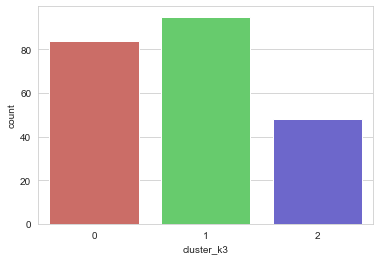

In [28]:
sns.countplot(x='cluster_k3', data=df, palette='hls')
plt.show()

In [32]:
# Dataframe with variables of interest
df_small=df.loc[0:, ['Rating', 'views', 'number_of_reviews','num_guest_stars', 'monicas_loc', 'chandlers_loc', 'ross_loc', 'central_perk_loc', 'ross_lines', 'rachel_lines', 'chandler_lines', 'monicas_lines', 'joey_lines', 'phoebe_lines','cluster_k3','cluster_k4']]


In [34]:

df_small_0= df_small[df_small["cluster_k3"] ==0]
df_small_1= df_small[df_small["cluster_k3"] ==1]
df_small_2= df_small[df_small["cluster_k3"] ==2]


In [35]:
df_small_0.describe()

,Rating,views,number_of_reviews,num_guest_stars,monicas_loc,chandlers_loc,ross_loc,central_perk_loc,ross_lines,rachel_lines,chandler_lines,monicas_lines,joey_lines,phoebe_lines,cluster_k3,cluster_k4
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0,84.000000
mean,8.326801,23.064286,3009.714286,0.488095,0.190294,0.145132,0.079650,0.179929,0.151057,0.165455,0.124236,0.118718,0.156380,0.111889,0.0,0.916667
std,0.306217,3.046646,297.113445,0.630434,0.140517,0.150209,0.113664,0.095429,0.044300,0.044191,0.037473,0.036265,0.055106,0.031758,0.0,1.346198
min,7.200000,16.300000,2599.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053812,0.060498,0.039062,0.015625,0.072650,0.042969,0.0,0.000000
25%,8.200000,21.400000,2814.250000,0.000000,0.071429,0.000000,0.000000,0.123162,0.124572,0.140122,0.106820,0.097402,0.118545,0.089968,0.0,0.000000
50%,8.300000,23.030000,2938.000000,0.000000,0.181985,0.094017,0.017241,0.171569,0.149083,0.161668,0.125245,0.115920,0.144630,0.108999,0.0,0.000000
75%,8.500000,24.850000,3142.750000,1.000000,0.307692,0.269444,0.135714,0.235294,0.177435,0.192279,0.146380,0.139541,0.187775,0.133333,0.0,3.000000
max,9.100000,31.200000,4498.000000,3.000000,0.500000,0.692308,0.461538,0.416667,0.280000,0.296460,0.252101,0.226562,0.400844,0.199219,0.0,3.000000


In [36]:
df_small_1.describe()

,Rating,views,number_of_reviews,num_guest_stars,monicas_loc,chandlers_loc,ross_loc,central_perk_loc,ross_lines,rachel_lines,chandler_lines,monicas_lines,joey_lines,phoebe_lines,cluster_k3,cluster_k4
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.0,95.000000
mean,8.356298,24.854632,3330.526316,0.273684,0.264199,0.141788,0.018943,0.213404,0.128128,0.127446,0.161878,0.155352,0.126865,0.138952,1.0,0.936842
std,0.326261,3.367118,469.501407,0.534792,0.153004,0.120148,0.057731,0.114964,0.040405,0.039281,0.053261,0.042581,0.037312,0.040488,0.0,0.579995
min,7.500000,15.650000,2628.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019763,0.036630,0.071429,0.062731,0.042857,0.045662,1.0,0.000000
25%,8.100000,22.400000,2992.500000,0.000000,0.154762,0.046653,0.000000,0.125000,0.101889,0.098659,0.129663,0.127988,0.101685,0.110394,1.0,1.000000
50%,8.300000,24.700000,3242.000000,0.000000,0.266667,0.133333,0.000000,0.230769,0.129921,0.129151,0.149798,0.151292,0.125490,0.142857,1.0,1.000000
75%,8.550000,26.880000,3578.000000,0.000000,0.384615,0.230769,0.000000,0.285714,0.154773,0.157091,0.186569,0.176239,0.152098,0.162044,1.0,1.000000
max,9.100000,32.200000,4667.000000,3.000000,0.571429,0.437500,0.307692,0.500000,0.235772,0.233607,0.417857,0.327014,0.214286,0.240157,1.0,3.000000


In [37]:
df_small_2.describe()

,Rating,views,number_of_reviews,num_guest_stars,monicas_loc,chandlers_loc,ross_loc,central_perk_loc,ross_lines,rachel_lines,chandler_lines,monicas_lines,joey_lines,phoebe_lines,cluster_k3,cluster_k4
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.000000
mean,8.812838,28.833542,4169.687500,0.520833,0.360167,0.080761,0.053408,0.085349,0.184492,0.179333,0.118814,0.141756,0.110785,0.110135,2.0,2.166667
std,0.403811,6.280407,1192.000021,0.922291,0.215145,0.108600,0.093866,0.089979,0.048634,0.046223,0.037679,0.046652,0.031513,0.035938,0.0,0.663111
min,8.000000,19.200000,2904.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.093190,0.082067,0.059041,0.050781,0.037037,0.045977,2.0,0.000000
25%,8.500000,25.277500,3423.500000,0.000000,0.166667,0.000000,0.000000,0.000000,0.155304,0.155822,0.086084,0.112661,0.086862,0.090245,2.0,2.000000
50%,8.875988,28.500000,3853.500000,0.000000,0.378571,0.031250,0.000000,0.075499,0.182164,0.177103,0.116795,0.124764,0.104892,0.108295,2.0,2.000000
75%,9.014651,31.150000,4328.500000,1.000000,0.500000,0.125000,0.083333,0.145604,0.210392,0.205349,0.142168,0.172554,0.137177,0.127977,2.0,3.000000
max,9.700000,52.900000,8411.000000,4.000000,0.750000,0.437500,0.333333,0.333333,0.309701,0.296875,0.218868,0.255061,0.188811,0.237736,2.0,3.000000


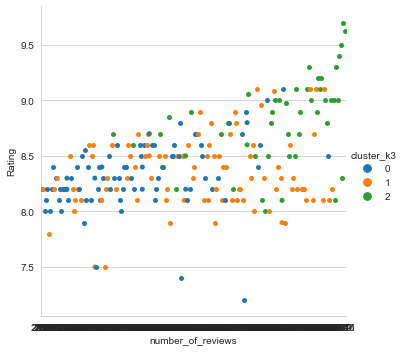

In [38]:
g=sns.catplot(x="number_of_reviews", y="Rating", hue="cluster_k3", kind="swarm", data=df_small)


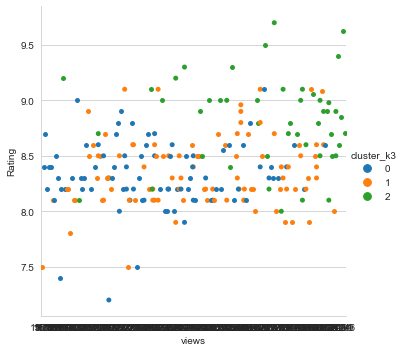

In [39]:
g=sns.catplot(x="views", y="Rating", hue="cluster_k3", kind="swarm", data=df_small)


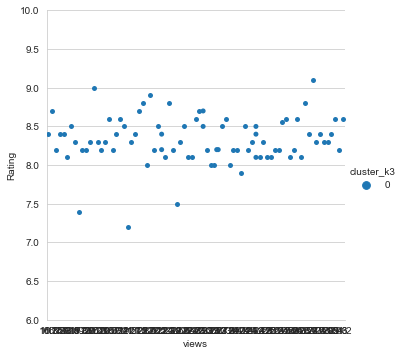

In [79]:
g=sns.catplot(x="views", y="Rating", hue="cluster_k3", kind="swarm", data=df_small_0)
g.set(ylim=(6, 10))

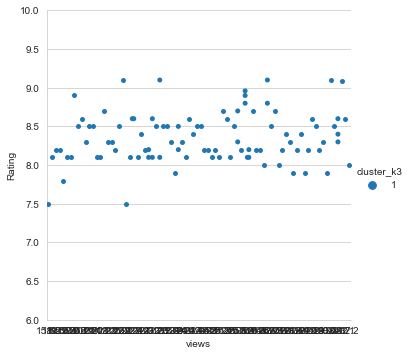

In [71]:
g=sns.catplot(x="views", y="Rating", hue="cluster_k3", kind="swarm", data=df_small_1)
g.set(ylim=(6, 10))

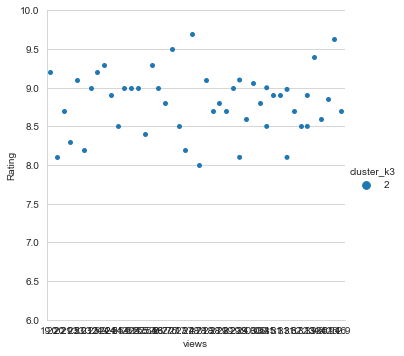

In [72]:
g=sns.catplot(x="views", y="Rating", hue="cluster_k3", kind="swarm", data=df_small_2)
g.set(ylim=(6, 10))

# Describing the K-Means K=4 Clusters

In [40]:
print(df['Rating'].groupby(df['cluster_k4']).mean())

cluster_k4
0    8.375890
1    8.285379
2    8.965673
3    8.396299
Name: Rating, dtype: float64


In [41]:
df['sub1']=0
df.loc[df['cluster_k4']==0, 'sub1']=1
df.loc[df['cluster_k4']==3, 'sub1']=2
df.loc[df['cluster_k4']==2, 'sub1']=3

df['cluster_k4']=df['sub1']

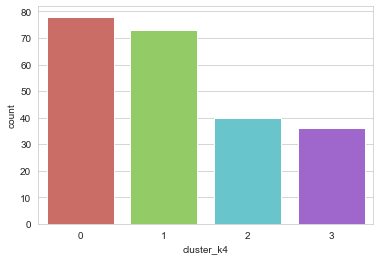

In [42]:
sns.countplot(x='cluster_k4', data=df, palette='hls')
plt.show()

In [43]:
df_small=df.loc[0:, ['Rating', 'views', 'number_of_reviews','num_guest_stars', 'monicas_loc', 'chandlers_loc', 'ross_loc', 'central_perk_loc', 'ross_lines', 'rachel_lines', 'chandler_lines', 'monicas_lines', 'joey_lines', 'phoebe_lines','cluster_k3','cluster_k4']]

In [44]:
df_k4_0= df_small[df_small["cluster_k4"] ==0]
df_k4_1= df_small[df_small["cluster_k4"] ==1]
df_k4_2= df_small[df_small["cluster_k4"] ==2]
df_k4_3= df_small[df_small["cluster_k4"] ==3]

In [45]:
df_k4_0.describe()

,Rating,views,number_of_reviews,num_guest_stars,monicas_loc,chandlers_loc,ross_loc,central_perk_loc,ross_lines,rachel_lines,chandler_lines,monicas_lines,joey_lines,phoebe_lines,cluster_k3,cluster_k4
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.0
mean,8.285379,24.671667,3339.051282,0.333333,0.255037,0.116700,0.011421,0.244157,0.131596,0.125954,0.156244,0.148319,0.121521,0.144524,0.948718,0.0
std,0.293178,3.413122,492.136764,0.595801,0.158374,0.107518,0.033452,0.111520,0.038722,0.041085,0.056239,0.043264,0.037051,0.040479,0.274332,0.0
min,7.500000,15.650000,2628.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049383,0.036630,0.071429,0.062731,0.042857,0.045662,0.000000,0.0
25%,8.100000,22.335000,2925.250000,0.000000,0.139163,0.000000,0.000000,0.157051,0.107583,0.094626,0.124634,0.124463,0.095333,0.121954,1.000000,0.0
50%,8.200000,24.445000,3249.500000,0.000000,0.256579,0.090909,0.000000,0.250000,0.131916,0.128765,0.146446,0.143867,0.118645,0.146876,1.000000,0.0
75%,8.500000,26.770000,3644.500000,1.000000,0.382212,0.184743,0.000000,0.307692,0.155648,0.153313,0.181874,0.169676,0.144463,0.166587,1.000000,0.0
max,9.100000,32.200000,4667.000000,3.000000,0.571429,0.400000,0.187500,0.500000,0.235772,0.243243,0.417857,0.327014,0.214286,0.240157,2.000000,0.0


In [46]:
df_k4_1.describe()

,Rating,views,number_of_reviews,num_guest_stars,monicas_loc,chandlers_loc,ross_loc,central_perk_loc,ross_lines,rachel_lines,chandler_lines,monicas_lines,joey_lines,phoebe_lines,cluster_k3,cluster_k4
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.0
mean,8.375890,23.179726,3027.931507,0.465753,0.198818,0.199273,0.026016,0.139891,0.132612,0.163560,0.133282,0.131833,0.159842,0.114375,0.273973,1.0
std,0.295210,3.403013,240.399628,0.625437,0.146121,0.153006,0.050310,0.077119,0.040466,0.043497,0.041726,0.040552,0.052395,0.030203,0.507178,0.0
min,7.400000,16.300000,2599.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019763,0.060498,0.039062,0.015625,0.068826,0.063291,0.000000,1.0
25%,8.200000,21.000000,2856.000000,0.000000,0.071429,0.076923,0.000000,0.076923,0.108635,0.138614,0.113014,0.108787,0.127907,0.090361,0.000000,1.0
50%,8.400000,22.660000,3012.000000,0.000000,0.187500,0.187500,0.000000,0.142857,0.139442,0.162362,0.127517,0.126531,0.154362,0.112727,0.000000,1.0
75%,8.600000,24.400000,3182.000000,1.000000,0.307692,0.285714,0.034483,0.187500,0.154812,0.186770,0.154412,0.160920,0.191837,0.136364,0.000000,1.0
max,9.088671,31.700000,3672.000000,3.000000,0.538462,0.692308,0.214286,0.312500,0.235669,0.296460,0.252101,0.232283,0.400844,0.199219,2.000000,1.0


In [47]:
df_k4_2.describe()

,Rating,views,number_of_reviews,num_guest_stars,monicas_loc,chandlers_loc,ross_loc,central_perk_loc,ross_lines,rachel_lines,chandler_lines,monicas_lines,joey_lines,phoebe_lines,cluster_k3,cluster_k4
count,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0
mean,8.396299,25.993500,3154.27500,0.225000,0.258408,0.050389,0.182305,0.176513,0.180206,0.175982,0.117077,0.116727,0.131192,0.112966,0.725000,2.0
std,0.345808,3.570819,390.60328,0.422902,0.178575,0.075562,0.134632,0.116293,0.045305,0.046267,0.036377,0.036934,0.047572,0.031024,0.933356,0.0
min,7.200000,16.570000,2680.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076233,0.100418,0.050420,0.050781,0.060748,0.042969,0.000000,2.0
25%,8.200000,23.837500,2881.00000,0.000000,0.131250,0.000000,0.081731,0.109649,0.149278,0.150540,0.085398,0.091452,0.097939,0.092930,0.000000,2.0
50%,8.350000,25.625000,3034.50000,0.000000,0.222527,0.000000,0.148352,0.160256,0.183135,0.164841,0.116824,0.120319,0.122486,0.108378,0.000000,2.0
75%,8.600000,27.665000,3355.25000,0.000000,0.400000,0.072802,0.279762,0.258929,0.208378,0.203708,0.139823,0.138298,0.156437,0.130558,2.000000,2.0
max,9.100000,34.910000,4395.00000,1.000000,0.583333,0.285714,0.461538,0.400000,0.280000,0.296875,0.192157,0.233184,0.308333,0.196347,2.000000,2.0


In [48]:
df_k4_3.describe()

,Rating,views,number_of_reviews,num_guest_stars,monicas_loc,chandlers_loc,ross_loc,central_perk_loc,ross_lines,rachel_lines,chandler_lines,monicas_lines,joey_lines,phoebe_lines,cluster_k3,cluster_k4
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.0
mean,8.965673,28.509722,4491.805556,0.638889,0.378573,0.107565,0.026989,0.087985,0.182308,0.161390,0.136600,0.157591,0.114195,0.104019,1.888889,3.0
std,0.343140,7.072771,1219.287211,1.018480,0.200897,0.119361,0.056850,0.085812,0.051878,0.047012,0.045359,0.048891,0.031804,0.038930,0.318728,0.0
min,8.100000,19.200000,3189.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.104701,0.082067,0.059041,0.074627,0.037037,0.045977,1.000000,3.0
25%,8.775449,24.442500,3800.750000,0.000000,0.234375,0.000000,0.000000,0.000000,0.137082,0.124814,0.107235,0.120618,0.093141,0.075651,2.000000,3.0
50%,9.000000,27.400000,4197.500000,0.000000,0.366071,0.080128,0.000000,0.075499,0.180340,0.161788,0.134903,0.147717,0.110948,0.097763,2.000000,3.0
75%,9.100000,30.650000,4659.000000,1.000000,0.500000,0.148810,0.008621,0.145604,0.211218,0.186596,0.163710,0.191050,0.142504,0.114419,2.000000,3.0
max,9.700000,52.900000,8411.000000,4.000000,0.750000,0.437500,0.230769,0.250000,0.309701,0.291866,0.243478,0.255061,0.174721,0.237736,2.000000,3.0


In [49]:
### pd.crosstab(df.rat_grouped, df.cluster_k4)

In [50]:
#pd.crosstab(df.views_cat, df.cluster_k4)

In [51]:
#pd.crosstab(df.num_reviews_cat, df.cluster_k4)

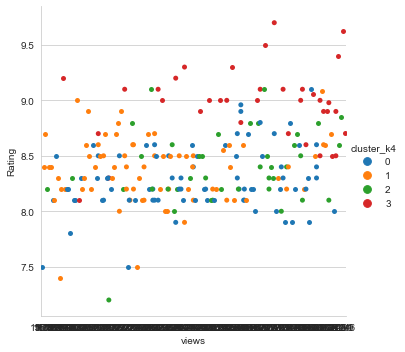

In [52]:
g=sns.catplot(x="views", y="Rating", hue="cluster_k4", kind="swarm", data=df_small)

# Fitting the K Modes Clustering Model

Selecting a new set of features that may include categorical variables

In [53]:
# Features_cat only has categorical variables
Features_cat= df[['rating_cat', 'views_cat','num_reviews_cat', 'epi_type_cat', 'common_director','season','episode']]


In [54]:
# Features: Features_cat
km = KModes(n_clusters=4, init='Huang', n_init=50, verbose=1, random_state=100)
clusters = km.fit_predict(Features_cat)
df['k4_mode_cluster']=clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 32, cost: 752.0
Run 1, iteration: 2/100, moves: 27, cost: 752.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 48, cost: 780.0
Run 2, iteration: 2/100, moves: 2, cost: 780.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 49, cost: 732.0
Run 3, iteration: 2/100, moves: 28, cost: 728.0
Run 3, iteration: 3/100, moves: 3, cost: 728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 19, cost: 759.0
Run 4, iteration: 2/100, moves: 10, cost: 759.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 45, cost: 720.0
Run 5, iteration: 2/100, moves: 0, cost: 720.0
Init: initializing centroids
Init: initializing clusters
Starting iteration

Run 45, iteration: 3/100, moves: 2, cost: 746.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 46, iteration: 1/100, moves: 48, cost: 725.0
Run 46, iteration: 2/100, moves: 2, cost: 725.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 47, iteration: 1/100, moves: 40, cost: 752.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 48, iteration: 1/100, moves: 80, cost: 718.0
Run 48, iteration: 2/100, moves: 13, cost: 717.0
Run 48, iteration: 3/100, moves: 1, cost: 717.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 49, iteration: 1/100, moves: 56, cost: 774.0
Run 49, iteration: 2/100, moves: 9, cost: 774.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 50, iteration: 1/100, moves: 52, cost: 741.0
Run 50, iteration: 2/100, moves: 6, cost: 741.0
Best run was number 18


In [55]:
km = KModes(n_clusters=3, init='Huang', n_init=50, verbose=1, random_state=100)
clusters = km.fit_predict(Features_cat)
df['k3_mode_cluster']=clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5, cost: 796.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 38, cost: 796.0
Run 2, iteration: 2/100, moves: 12, cost: 795.0
Run 2, iteration: 3/100, moves: 0, cost: 795.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 54, cost: 811.0
Run 3, iteration: 2/100, moves: 14, cost: 811.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 28, cost: 784.0
Run 4, iteration: 2/100, moves: 33, cost: 771.0
Run 4, iteration: 3/100, moves: 7, cost: 771.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 58, cost: 760.0
Run 5, iteration: 2/100, moves: 28, cost: 760.0
Init: initializing centroids
Init: initializing clusters
Starting iteration

# Describing K-Modes K=3 Clusters

In [56]:
print(df['Rating'].groupby(df['k3_mode_cluster']).mean())

k3_mode_cluster
0    8.250549
1    8.769277
2    8.397963
Name: Rating, dtype: float64


In [57]:
df['sub']=0
df.loc[df['k3_mode_cluster']==2, 'sub']=1
df.loc[df['k3_mode_cluster']==1, 'sub']=2

df['k3_mode_cluster']=df['sub']

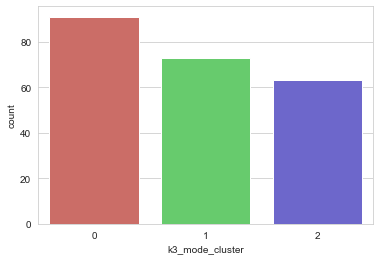

In [58]:
sns.countplot(x='k3_mode_cluster', data=df, palette='hls')
plt.show()

In [59]:
pd.crosstab(df.rat_grouped, df.k3_mode_cluster)

k3_mode_cluster,0,1,2
rat_grouped,,,
above,9,7,42
av,28,44,12
below,54,22,9


In [60]:
pd.crosstab(df.views_cat, df.k3_mode_cluster)

k3_mode_cluster,0,1,2
views_cat,,,
0,62,6,3
1,25,53,19
2,4,14,41


In [61]:
pd.crosstab(df.num_reviews_cat, df.k3_mode_cluster)

k3_mode_cluster,0,1,2
num_reviews_cat,,,
0,62,7,3
1,19,61,28
2,10,5,32


In [62]:
df_small=df.loc[0:, ['Rating', 'views', 'number_of_reviews','num_guest_stars', 'monicas_loc', 'chandlers_loc', 'ross_loc', 'central_perk_loc', 'ross_lines', 'rachel_lines', 'chandler_lines', 'monicas_lines', 'joey_lines', 'phoebe_lines','k3_mode_cluster','k4_mode_cluster']]

In [63]:
df_k3m_0= df_small[df_small["k3_mode_cluster"] ==0]
df_k3m_1= df_small[df_small["k3_mode_cluster"] ==1]
df_k3m_2= df_small[df_small["k3_mode_cluster"] ==2]


In [64]:
df_k3m_0.describe()

,Rating,views,number_of_reviews,num_guest_stars,monicas_loc,chandlers_loc,ross_loc,central_perk_loc,ross_lines,rachel_lines,chandler_lines,monicas_lines,joey_lines,phoebe_lines,k3_mode_cluster,k4_mode_cluster
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.0,91.000000
mean,8.250549,22.075165,3061.175824,0.417582,0.215393,0.133872,0.047446,0.199243,0.142638,0.155410,0.140195,0.139739,0.140212,0.126693,0.0,0.428571
std,0.322619,2.768170,490.614888,0.597512,0.166903,0.131354,0.088597,0.109018,0.043462,0.047852,0.053984,0.047375,0.052284,0.039858,0.0,0.979148
min,7.200000,15.650000,2599.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053812,0.036630,0.039062,0.015625,0.037037,0.042969,0.0,0.000000
25%,8.100000,20.550000,2788.000000,0.000000,0.071429,0.000000,0.000000,0.125000,0.110615,0.130877,0.115227,0.108339,0.106761,0.099356,0.0,0.000000
50%,8.200000,22.050000,2882.000000,0.000000,0.200000,0.125000,0.000000,0.187500,0.142308,0.159184,0.134276,0.134783,0.134529,0.127490,0.0,0.000000
75%,8.400000,23.700000,3054.000000,1.000000,0.333333,0.214286,0.071429,0.281746,0.171238,0.181663,0.158007,0.160862,0.170303,0.149744,0.0,0.000000
max,9.100000,29.240000,4953.000000,3.000000,0.750000,0.692308,0.428571,0.500000,0.280000,0.284000,0.417857,0.327014,0.400844,0.240157,0.0,3.000000


In [65]:
df_k3m_1.describe()

,Rating,views,number_of_reviews,num_guest_stars,monicas_loc,chandlers_loc,ross_loc,central_perk_loc,ross_lines,rachel_lines,chandler_lines,monicas_lines,joey_lines,phoebe_lines,k3_mode_cluster,k4_mode_cluster
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.0,73.000000
mean,8.397963,25.282055,3256.232877,0.301370,0.268103,0.145603,0.049091,0.176566,0.141733,0.148825,0.141956,0.136723,0.133674,0.121304,1.0,2.136986
std,0.227076,2.425502,300.583207,0.593599,0.145693,0.125587,0.101027,0.097326,0.047023,0.047011,0.040946,0.041647,0.042930,0.035518,0.0,0.804761
min,7.900000,18.600000,2747.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019763,0.072874,0.050420,0.043825,0.044534,0.060606,1.0,0.000000
25%,8.200000,23.800000,3058.000000,0.000000,0.176471,0.052632,0.000000,0.111111,0.112903,0.113208,0.115607,0.111111,0.107280,0.090361,1.0,2.000000
50%,8.400000,24.800000,3201.000000,0.000000,0.272727,0.133333,0.000000,0.166667,0.143939,0.149660,0.134884,0.132743,0.125490,0.118774,1.0,2.000000
75%,8.500000,26.100000,3310.000000,0.000000,0.363636,0.250000,0.066667,0.250000,0.167969,0.169492,0.162791,0.165663,0.154362,0.141700,1.0,3.000000
max,9.000000,32.900000,4498.000000,3.000000,0.571429,0.444444,0.461538,0.400000,0.251142,0.296875,0.244094,0.233184,0.292035,0.197842,1.0,3.000000


In [66]:
df_k3m_2.describe()

,Rating,views,number_of_reviews,num_guest_stars,monicas_loc,chandlers_loc,ross_loc,central_perk_loc,ross_lines,rachel_lines,chandler_lines,monicas_lines,joey_lines,phoebe_lines,k3_mode_cluster,k4_mode_cluster
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.0,63.000000
mean,8.769277,29.018571,4017.285714,0.507937,0.304750,0.106763,0.050041,0.134347,0.164920,0.152492,0.133281,0.140285,0.126798,0.119067,2.0,1.285714
std,0.412726,5.384043,1080.531268,0.839989,0.203157,0.138609,0.091915,0.126826,0.053431,0.049002,0.049464,0.043028,0.043413,0.041106,0.0,0.607177
min,7.900000,19.200000,2687.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049383,0.042194,0.059041,0.067511,0.060748,0.045977,2.0,1.000000
25%,8.500000,26.550000,3403.000000,0.000000,0.153846,0.000000,0.000000,0.000000,0.129526,0.115854,0.096099,0.112967,0.094395,0.092925,2.0,1.000000
50%,8.800000,29.000000,3783.000000,0.000000,0.259259,0.062500,0.000000,0.111111,0.160784,0.150980,0.129167,0.127119,0.121339,0.110048,2.0,1.000000
75%,9.073638,30.500000,4232.000000,1.000000,0.485294,0.162281,0.080128,0.240385,0.205998,0.181132,0.156157,0.164232,0.146300,0.149263,2.0,1.000000
max,9.700000,52.900000,8411.000000,4.000000,0.750000,0.500000,0.333333,0.454545,0.309701,0.291866,0.362869,0.255061,0.308333,0.237736,2.0,3.000000


# Describing K-Modes K=4 Clusters


In [67]:
print(df['Rating'].groupby(df['k4_mode_cluster']).mean())

k4_mode_cluster
0    8.235000
1    8.786866
2    8.303774
3    8.561876
Name: Rating, dtype: float64


In [147]:
df['sub1']=0
df.loc[df['k4_mode_cluster']==2, 'sub1']=1
df.loc[df['k4_mode_cluster']==3, 'sub1']=2
df.loc[df['k4_mode_cluster']==1, 'sub1']=3

df['k4_mode_cluster']=df['sub1']

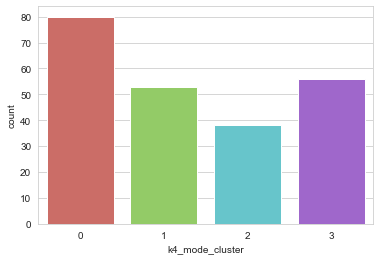

In [148]:
sns.countplot(x='k4_mode_cluster', data=df, palette='hls')
plt.show()

In [156]:
df_small=df.loc[0:, ['Rating', 'views', 'number_of_reviews', 'monicas_loc', 'chandlers_loc', 'ross_loc', 'central_perk_loc', 'ross_lines', 'rachel_lines', 'chandler_lines', 'monicas_lines', 'joey_lines', 'phoebe_lines','num_guest_stars','k3_mode_cluster','k4_mode_cluster']]

In [157]:
df_k4m_0= df_small[df_small["k4_mode_cluster"] ==0]
df_k4m_1= df_small[df_small["k4_mode_cluster"] ==1]
df_k4m_2= df_small[df_small["k4_mode_cluster"] ==2]
df_k4m_3= df_small[df_small["k4_mode_cluster"] ==3]

In [158]:
df_k4m_0.describe()

,Rating,views,number_of_reviews,monicas_loc,chandlers_loc,ross_loc,central_perk_loc,ross_lines,rachel_lines,chandler_lines,monicas_lines,joey_lines,phoebe_lines,num_guest_stars,k3_mode_cluster,k4_mode_cluster
count,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.0
mean,8.23500,21.828625,3023.825000,0.222935,0.136053,0.045123,0.194511,0.142337,0.156743,0.142547,0.138180,0.140219,0.125715,0.450000,0.062500,0.0
std,0.31866,2.755349,481.800704,0.168551,0.137440,0.084951,0.114707,0.044480,0.048261,0.056897,0.046520,0.054522,0.039652,0.614178,0.243589,0.0
min,7.20000,15.650000,2599.000000,0.000000,0.000000,0.000000,0.000000,0.053812,0.036630,0.039062,0.015625,0.037037,0.042969,0.000000,0.000000,0.0
25%,8.10000,20.335000,2779.500000,0.076923,0.000000,0.000000,0.116013,0.110863,0.136054,0.117057,0.106659,0.105053,0.100000,0.000000,0.000000,0.0
50%,8.20000,21.725000,2866.000000,0.205263,0.125000,0.000000,0.181985,0.143445,0.159358,0.134580,0.134664,0.133271,0.127010,0.000000,0.000000,0.0
75%,8.40000,23.017500,3003.500000,0.352941,0.214286,0.071429,0.269444,0.170764,0.182325,0.168809,0.160833,0.167323,0.149081,1.000000,0.000000,0.0
max,9.10000,29.240000,4953.000000,0.750000,0.692308,0.428571,0.500000,0.280000,0.284000,0.417857,0.242857,0.400844,0.240157,3.000000,1.000000,0.0


In [159]:
df_k4m_1.describe()

,Rating,views,number_of_reviews,monicas_loc,chandlers_loc,ross_loc,central_perk_loc,ross_lines,rachel_lines,chandler_lines,monicas_lines,joey_lines,phoebe_lines,num_guest_stars,k3_mode_cluster,k4_mode_cluster
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.0
mean,8.303774,26.249245,3337.943396,0.283001,0.128479,0.056659,0.189497,0.148520,0.146025,0.130569,0.134135,0.131357,0.122835,0.283019,1.056604,1.0
std,0.265998,2.481427,272.591792,0.155655,0.111412,0.108371,0.086805,0.047943,0.043771,0.039517,0.039037,0.043522,0.033728,0.600556,0.496724,0.0
min,7.900000,22.600000,2776.000000,0.000000,0.000000,0.000000,0.062500,0.060729,0.067138,0.071429,0.050781,0.044534,0.060606,0.000000,0.000000,1.0
25%,8.100000,24.300000,3166.000000,0.187500,0.052632,0.000000,0.125000,0.112903,0.113208,0.103286,0.108787,0.106557,0.091324,0.000000,1.000000,1.0
50%,8.200000,25.800000,3279.000000,0.272727,0.090909,0.000000,0.187500,0.145329,0.149660,0.126761,0.139831,0.125490,0.122271,0.000000,1.000000,1.0
75%,8.500000,28.100000,3495.000000,0.400000,0.250000,0.071429,0.266667,0.181818,0.165919,0.147679,0.160959,0.156780,0.144981,0.000000,1.000000,1.0
max,9.100000,32.900000,4049.000000,0.583333,0.400000,0.461538,0.454545,0.251142,0.296875,0.231373,0.233184,0.308333,0.197842,3.000000,2.000000,1.0


In [160]:
df_k4m_2.describe()

,Rating,views,number_of_reviews,monicas_loc,chandlers_loc,ross_loc,central_perk_loc,ross_lines,rachel_lines,chandler_lines,monicas_lines,joey_lines,phoebe_lines,num_guest_stars,k3_mode_cluster,k4_mode_cluster
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0
mean,8.561876,24.758947,3139.131579,0.220332,0.187173,0.051718,0.182968,0.138378,0.148072,0.147605,0.136240,0.142824,0.125067,0.342105,0.894737,2.0
std,0.177607,2.616559,226.852276,0.150869,0.147046,0.098798,0.115299,0.043485,0.053908,0.050114,0.035281,0.051289,0.040569,0.534047,0.605804,0.0
min,8.300000,20.210000,2704.000000,0.000000,0.000000,0.000000,0.000000,0.019763,0.042194,0.050420,0.067227,0.052000,0.068826,0.000000,0.000000,2.0
25%,8.500000,23.215000,3017.250000,0.082983,0.071429,0.000000,0.111111,0.114253,0.111770,0.124698,0.114348,0.112320,0.092967,0.000000,1.000000,2.0
50%,8.500000,24.400000,3090.000000,0.230769,0.181985,0.000000,0.160256,0.141240,0.139947,0.147319,0.129412,0.129048,0.117013,0.000000,1.000000,2.0
75%,8.600000,25.520000,3270.000000,0.312500,0.302198,0.071429,0.250000,0.167643,0.178478,0.159852,0.160823,0.167611,0.142299,1.000000,1.000000,2.0
max,9.000000,31.200000,3716.000000,0.500000,0.500000,0.384615,0.454545,0.235669,0.296460,0.362869,0.207843,0.292035,0.225397,2.000000,2.000000,2.0


In [161]:
df_k4m_3.describe()

,Rating,views,number_of_reviews,monicas_loc,chandlers_loc,ross_loc,central_perk_loc,ross_lines,rachel_lines,chandler_lines,monicas_lines,joey_lines,phoebe_lines,num_guest_stars,k3_mode_cluster,k4_mode_cluster
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0
mean,8.786866,28.647500,4129.589286,0.306520,0.084486,0.044211,0.123701,0.164279,0.155500,0.135435,0.146328,0.123197,0.117243,0.500000,1.857143,3.0
std,0.412333,5.884195,1115.933393,0.201855,0.116909,0.087130,0.120013,0.054441,0.046666,0.042501,0.050692,0.032679,0.041369,0.873863,0.444300,0.0
min,7.900000,18.600000,2687.000000,0.000000,0.000000,0.000000,0.000000,0.049383,0.082090,0.059041,0.062731,0.069672,0.045977,0.000000,0.000000,3.0
25%,8.500000,25.745000,3516.500000,0.153846,0.000000,0.000000,0.000000,0.129772,0.117795,0.107235,0.114465,0.095088,0.092072,0.000000,2.000000,3.0
50%,8.800000,28.520000,3902.000000,0.279221,0.017241,0.000000,0.090909,0.158779,0.152245,0.131092,0.130226,0.121276,0.108378,0.000000,2.000000,3.0
75%,9.091503,30.425000,4265.750000,0.477941,0.127083,0.041487,0.230769,0.205294,0.185216,0.159896,0.172176,0.145940,0.150676,1.000000,2.000000,3.0
max,9.700000,52.900000,8411.000000,0.750000,0.437500,0.333333,0.400000,0.309701,0.291866,0.227273,0.327014,0.188811,0.237736,4.000000,2.000000,3.0


In [162]:
pd.crosstab(df.rat_grouped, df.k4_mode_cluster)

k4_mode_cluster,0,1,2,3
rat_grouped,,,,
above,6,6,8,38
av,27,15,30,12
below,47,32,0,6


In [163]:
pd.crosstab(df.views_cat, df.k4_mode_cluster)

k4_mode_cluster,0,1,2,3
views_cat,,,,
0,59,1,7,4
1,17,36,26,18
2,4,16,5,34


# K-Prototype Clustering Model

In [164]:
#Features_wcat has a combination of numerical and categorical variables
Features_wcat= df[['rating_cat', 'views_cat','num_reviews_cat','season','episode', 'common_director','num_guest_stars_std','central_perk_loc_std', 'monicas_loc_std',
       'chandlers_loc_std','ross_loc_std','monicas_lines_std', 'rachel_lines_std', 'ross_lines_std',
       'phoebe_lines_std', 'joey_lines_std', 'chandler_lines_std','all_lines_std']]

In [165]:
#Features_wcat_nos has a combination of numerical and categorical variables. Furthermore, variables with sparse data were removed.
Features_wcat_nos= df[['rating_cat', 'views_cat','num_reviews_cat','central_perk_loc_std', 'monicas_loc_std',
       'chandlers_loc_std','monicas_lines_std', 'rachel_lines_std', 'ross_lines_std',
       'phoebe_lines_std', 'joey_lines_std', 'chandler_lines_std' ]]


In [168]:
kproto = KPrototypes(n_clusters=4, init='Cao', verbose=2, random_state=102)
clusters = kproto.fit_predict(Features_wcat, categorical=[1, 2,3,4,5,6])
df['k4_pro_cluster']=clusters
#clusters = KPrototypes().fit_predict(X, categorical=[1, 2])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 57, ncost: 2574.570278571301
Run: 1, iteration: 2/100, moves: 18, ncost: 2560.2764826975604
Run: 1, iteration: 3/100, moves: 7, ncost: 2557.1800274783873
Run: 1, iteration: 4/100, moves: 6, ncost: 2554.0272261489386
Run: 1, iteration: 5/100, moves: 0, ncost: 2554.0272261489386
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 61, ncost: 2607.3796302751693
Run: 2, iteration: 2/100, moves: 30, ncost: 2575.116360400343
Run: 2, iteration: 3/100, moves: 3, ncost: 2574.4520079597532
Run: 2, iteration: 4/100, moves: 0, ncost: 2574.4520079597532
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 49, ncost: 2622.3402852464155
Run: 3, iteration: 2/100, moves: 24, ncost: 2595.3523281445664
Run: 3, iteration: 3/100, moves: 15, ncost: 2582.5068715204175
Run: 3, ite

In [194]:
kproto = KPrototypes(n_clusters=4, init='Cao', verbose=2, random_state=102)
clusters = kproto.fit_predict(Features_wcat_nos, categorical=[1, 2,3,4,5,6])
df['k4nos_pro_cluster']=clusters
#clusters = KPrototypes().fit_predict(X, categorical=[1, 2])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 53, ncost: 1361.865555873805
Run: 1, iteration: 2/100, moves: 39, ncost: 1345.5063347280045
Run: 1, iteration: 3/100, moves: 12, ncost: 1341.3160798733809
Run: 1, iteration: 4/100, moves: 5, ncost: 1339.3976070323333
Run: 1, iteration: 5/100, moves: 4, ncost: 1338.6978543638547
Run: 1, iteration: 6/100, moves: 0, ncost: 1338.6978543638547
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 52, ncost: 1382.0029592162384
Run: 2, iteration: 2/100, moves: 32, ncost: 1354.493059672147
Run: 2, iteration: 3/100, moves: 15, ncost: 1349.0431267419283
Run: 2, iteration: 4/100, moves: 8, ncost: 1346.7171637616523
Run: 2, iteration: 5/100, moves: 4, ncost: 1346.1469215592738
Run: 2, iteration: 6/100, moves: 1, ncost: 1346.0511733351873
Run: 2, iteration: 7/100, moves: 0, ncost: 1346.0511733351873
Init: initializing centroids
I

# Describing K-Prototype K=4 Clusters

In [172]:
print(df['Rating'].groupby(df['k4_pro_cluster']).mean())

k4_pro_cluster
0    8.278600
1    8.417184
2    8.503571
3    8.642772
Name: Rating, dtype: float64


In [171]:
df['sub1']=0
df.loc[df['k4_pro_cluster']==1, 'sub1']=1
df.loc[df['k4_pro_cluster']==3, 'sub1']=2
df.loc[df['k4_pro_cluster']==0, 'sub1']=3

df['k4_pro_cluster']=df['sub1']

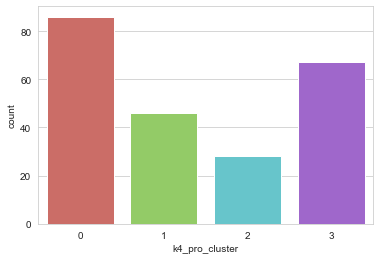

In [173]:
sns.countplot(x='k4_pro_cluster', data=df, palette='hls')
plt.show()

In [179]:
df_small=df.loc[0:, ['Rating', 'views', 'number_of_reviews', 'monicas_loc', 'chandlers_loc', 'ross_loc', 'central_perk_loc', 'ross_lines', 'rachel_lines', 'chandler_lines', 'monicas_lines', 'joey_lines', 'phoebe_lines','num_guest_stars','k4_pro_cluster','k4nos_pro_cluster']]


In [180]:
df_k4p_0= df_small[df_small["k4_pro_cluster"] ==0]
df_k4p_1= df_small[df_small["k4_pro_cluster"] ==1]
df_k4p_2= df_small[df_small["k4_pro_cluster"] ==2]
df_k4p_3= df_small[df_small["k4_pro_cluster"] ==3]

In [181]:
df_k4p_0.describe()

,Rating,views,number_of_reviews,monicas_loc,chandlers_loc,ross_loc,central_perk_loc,ross_lines,rachel_lines,chandler_lines,monicas_lines,joey_lines,phoebe_lines,num_guest_stars,k4_pro_cluster,k4nos_pro_cluster
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0,86.000000
mean,8.278600,24.522093,3263.116279,0.250206,0.104147,0.010172,0.230952,0.129342,0.132856,0.150138,0.144399,0.125737,0.145783,0.383721,0.0,2.337209
std,0.297157,3.398091,492.971313,0.155851,0.099298,0.028157,0.113183,0.037498,0.039784,0.050754,0.038790,0.037479,0.037174,0.616796,0.0,0.834696
min,7.500000,15.650000,2628.000000,0.000000,0.000000,0.000000,0.000000,0.053812,0.036630,0.071429,0.043825,0.042857,0.045662,0.000000,0.0,0.000000
25%,8.100000,22.410000,2866.000000,0.134483,0.000000,0.000000,0.135714,0.105210,0.104674,0.119876,0.118917,0.099113,0.126121,0.000000,0.0,2.000000
50%,8.200000,24.385000,3168.000000,0.264912,0.076923,0.000000,0.250000,0.130065,0.135638,0.140522,0.141770,0.122705,0.146876,0.000000,0.0,3.000000
75%,8.400000,26.667500,3542.750000,0.362013,0.163462,0.000000,0.294118,0.151806,0.158660,0.174130,0.162162,0.144940,0.166587,1.000000,0.0,3.000000
max,9.100000,32.200000,4667.000000,0.571429,0.400000,0.142857,0.500000,0.235772,0.243243,0.417857,0.242857,0.214286,0.240157,3.000000,0.0,3.000000


In [182]:
df_k4p_1.describe()

,Rating,views,number_of_reviews,monicas_loc,chandlers_loc,ross_loc,central_perk_loc,ross_lines,rachel_lines,chandler_lines,monicas_lines,joey_lines,phoebe_lines,num_guest_stars,k4_pro_cluster,k4nos_pro_cluster
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0,46.000000
mean,8.417184,23.995652,3144.586957,0.145785,0.270736,0.026864,0.165586,0.120716,0.164300,0.145085,0.123483,0.167402,0.110826,0.434783,1.0,1.673913
std,0.341622,5.646545,394.447100,0.124572,0.146976,0.047199,0.087409,0.036666,0.052939,0.052736,0.041773,0.059736,0.029372,0.719635,0.0,0.598307
min,7.400000,16.300000,2599.000000,0.000000,0.000000,0.000000,0.000000,0.019763,0.042194,0.041096,0.015625,0.068826,0.063291,0.000000,1.0,0.000000
25%,8.200000,21.130000,2896.250000,0.008621,0.146617,0.000000,0.114583,0.095995,0.125494,0.118512,0.097231,0.125099,0.089236,0.000000,1.0,1.000000
50%,8.500000,22.680000,3014.500000,0.142857,0.277778,0.000000,0.169540,0.124144,0.162206,0.144239,0.121761,0.163457,0.107900,0.000000,1.0,2.000000
75%,8.600000,25.522500,3231.000000,0.231203,0.356092,0.048094,0.222222,0.149629,0.191402,0.157868,0.151560,0.196257,0.127523,1.000000,1.0,2.000000
max,9.100000,52.900000,4384.000000,0.400000,0.692308,0.166667,0.454545,0.181818,0.296460,0.362869,0.232283,0.400844,0.199219,4.000000,1.0,3.000000


In [183]:
df_k4p_2.describe()

,Rating,views,number_of_reviews,monicas_loc,chandlers_loc,ross_loc,central_perk_loc,ross_lines,rachel_lines,chandler_lines,monicas_lines,joey_lines,phoebe_lines,num_guest_stars,k4_pro_cluster,k4nos_pro_cluster
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.0,28.000000
mean,8.503571,24.471786,3428.928571,0.244342,0.058926,0.261278,0.171190,0.157991,0.160883,0.129039,0.136640,0.133644,0.123227,0.321429,2.0,1.464286
std,0.384402,3.415593,1203.211349,0.158633,0.068562,0.090167,0.104412,0.043210,0.041501,0.043353,0.049384,0.049462,0.041725,0.669636,0.0,1.137969
min,8.000000,16.550000,2680.000000,0.000000,0.000000,0.133333,0.000000,0.076233,0.082949,0.039062,0.070833,0.060748,0.042969,0.000000,2.0,0.000000
25%,8.200000,22.845000,2895.500000,0.148718,0.000000,0.196875,0.098178,0.137618,0.140649,0.099149,0.102028,0.104156,0.092930,0.000000,2.0,0.000000
50%,8.450000,24.650000,3023.000000,0.214286,0.055728,0.264912,0.153846,0.162781,0.162181,0.133358,0.127128,0.123055,0.120896,0.000000,2.0,2.000000
75%,8.725000,26.820000,3348.500000,0.343750,0.085470,0.314103,0.238971,0.183896,0.191836,0.163269,0.156033,0.159844,0.147375,0.250000,2.0,2.000000
max,9.700000,30.400000,8166.000000,0.571429,0.214286,0.461538,0.400000,0.237354,0.257246,0.218868,0.242525,0.308333,0.237736,3.000000,2.0,3.000000


In [184]:
df_k4p_3.describe()

,Rating,views,number_of_reviews,monicas_loc,chandlers_loc,ross_loc,central_perk_loc,ross_lines,rachel_lines,chandler_lines,monicas_lines,joey_lines,phoebe_lines,num_guest_stars,k4_pro_cluster,k4nos_pro_cluster
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.0,67.000000
mean,8.642772,26.637164,3702.567164,0.347853,0.096671,0.024291,0.107644,0.188304,0.166051,0.124155,0.143441,0.123133,0.101491,0.447761,3.0,0.656716
std,0.426185,5.116026,945.499246,0.187957,0.110866,0.043239,0.095503,0.043256,0.048433,0.041333,0.048441,0.037177,0.028933,0.723702,0.0,0.977818
min,7.200000,19.200000,2661.000000,0.000000,0.000000,0.000000,0.000000,0.109312,0.060498,0.050420,0.050781,0.037037,0.044000,0.000000,3.0,0.000000
25%,8.400000,22.980000,3126.000000,0.230769,0.000000,0.000000,0.000000,0.160978,0.132881,0.092321,0.113388,0.093390,0.078037,0.000000,3.0,0.000000
50%,8.600000,25.540000,3404.000000,0.357143,0.076923,0.000000,0.090909,0.183206,0.164286,0.123853,0.130435,0.122137,0.098361,0.000000,3.0,0.000000
75%,8.989394,29.400000,4066.000000,0.500000,0.160256,0.048491,0.166667,0.210259,0.200410,0.146907,0.171841,0.146300,0.120345,1.000000,3.0,1.000000
max,9.625051,52.460000,8411.000000,0.750000,0.437500,0.166667,0.333333,0.309701,0.296875,0.243478,0.327014,0.206406,0.161137,3.000000,3.0,3.000000


# Describing K-Prototype K=4 Clusters No Sparse Data

In [197]:
print(df['Rating'].groupby(df['k4nos_pro_cluster']).mean())

k4nos_pro_cluster
0    8.337707
1    8.415794
2    8.453189
3    8.594434
Name: Rating, dtype: float64


In [196]:
df['sub1']=0
df.loc[df['k4nos_pro_cluster']==3, 'sub1']=1
df.loc[df['k4nos_pro_cluster']==1, 'sub1']=2
df.loc[df['k4nos_pro_cluster']==0, 'sub1']=3

df['k4nos_pro_cluster']=df['sub1']

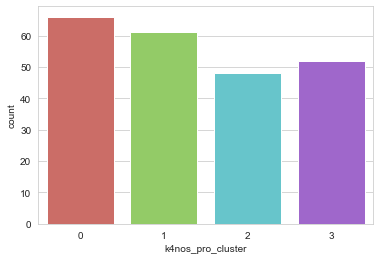

In [198]:
sns.countplot(x='k4nos_pro_cluster', data=df, palette='hls')
plt.show()

In [254]:
df_small=df.loc[0:, ['Rating', 'views', 'number_of_reviews', 'monicas_loc', 'chandlers_loc', 'ross_loc', 'central_perk_loc', 'ross_lines', 'rachel_lines', 'chandler_lines', 'monicas_lines', 'joey_lines', 'phoebe_lines','num_guest_stars','k4_pro_cluster','k4nos_pro_cluster','season','episode','epi_type']]


In [255]:
df_k4p_0= df_small[df_small["k4nos_pro_cluster"] ==0]
df_k4p_1= df_small[df_small["k4nos_pro_cluster"] ==1]
df_k4p_2= df_small[df_small["k4nos_pro_cluster"] ==2]
df_k4p_3= df_small[df_small["k4nos_pro_cluster"] ==3]

In [201]:
df_k4p_0.describe()

,Rating,views,number_of_reviews,monicas_loc,chandlers_loc,ross_loc,central_perk_loc,ross_lines,rachel_lines,chandler_lines,monicas_lines,joey_lines,phoebe_lines,num_guest_stars,k4_pro_cluster,k4nos_pro_cluster
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.0
mean,8.337707,23.460152,3202.757576,0.245272,0.126826,0.055784,0.175032,0.126673,0.175832,0.117941,0.141220,0.162159,0.114566,0.454545,1.106061,0.0
std,0.309296,3.555500,607.597946,0.169751,0.132475,0.100538,0.091940,0.033493,0.040137,0.029677,0.047832,0.054755,0.025951,0.636863,0.994273,0.0
min,7.500000,16.300000,2599.000000,0.000000,0.000000,0.000000,0.000000,0.053812,0.098540,0.039062,0.033755,0.084942,0.063123,0.000000,0.000000,0.0
25%,8.200000,21.350000,2857.250000,0.114662,0.000000,0.000000,0.111111,0.103897,0.154404,0.103943,0.113263,0.124056,0.095755,0.000000,0.000000,0.0
50%,8.200000,23.100000,3025.000000,0.266667,0.088462,0.000000,0.160256,0.131068,0.165652,0.124689,0.136600,0.153529,0.113952,0.000000,1.000000,0.0
75%,8.500000,25.482500,3325.750000,0.356092,0.214286,0.071429,0.230769,0.152934,0.191402,0.135315,0.162967,0.194272,0.129332,1.000000,2.000000,0.0
max,9.100000,31.300000,6579.000000,0.571429,0.571429,0.428571,0.416667,0.208333,0.296875,0.175824,0.327014,0.400844,0.171875,3.000000,3.000000,0.0


In [202]:
df_k4p_1.describe()

,Rating,views,number_of_reviews,monicas_loc,chandlers_loc,ross_loc,central_perk_loc,ross_lines,rachel_lines,chandler_lines,monicas_lines,joey_lines,phoebe_lines,num_guest_stars,k4_pro_cluster,k4nos_pro_cluster
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.00000,61.0
mean,8.415794,25.145082,3407.295082,0.212755,0.115861,0.037127,0.192298,0.136351,0.128016,0.137746,0.134871,0.114381,0.167489,0.393443,0.47541,1.0
std,0.393566,4.900101,1011.559758,0.174235,0.102175,0.079616,0.115756,0.036960,0.034684,0.034810,0.039800,0.030165,0.027431,0.665299,0.97650,0.0
min,7.800000,16.570000,2628.000000,0.000000,0.000000,0.000000,0.000000,0.059055,0.036630,0.051282,0.015625,0.044534,0.122951,0.000000,0.00000,1.0
25%,8.100000,22.440000,2915.000000,0.066667,0.000000,0.000000,0.083333,0.121094,0.104167,0.117647,0.109272,0.095238,0.149007,0.000000,0.00000,1.0
50%,8.300000,24.460000,3159.000000,0.200000,0.100000,0.000000,0.200000,0.137168,0.129151,0.135371,0.129139,0.109589,0.158798,0.000000,0.00000,1.0
75%,8.600000,26.800000,3524.000000,0.307692,0.176471,0.000000,0.272727,0.159664,0.153846,0.154867,0.157895,0.131931,0.181818,1.000000,0.00000,1.0
max,9.700000,52.460000,8411.000000,0.750000,0.400000,0.307692,0.454545,0.219081,0.194346,0.218868,0.233871,0.208791,0.240157,3.000000,3.00000,1.0


In [203]:
df_k4p_2.describe()

,Rating,views,number_of_reviews,monicas_loc,chandlers_loc,ross_loc,central_perk_loc,ross_lines,rachel_lines,chandler_lines,monicas_lines,joey_lines,phoebe_lines,num_guest_stars,k4_pro_cluster,k4nos_pro_cluster
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,8.453189,25.133125,3360.791667,0.269644,0.188171,0.038405,0.195132,0.130804,0.114721,0.194171,0.147437,0.142367,0.102204,0.458333,1.208333,2.0
std,0.373829,5.313542,468.260973,0.140046,0.160834,0.081519,0.126741,0.039946,0.032548,0.055196,0.046925,0.044860,0.027561,0.874176,1.166160,0.0
min,7.400000,15.650000,2757.000000,0.034483,0.000000,0.000000,0.000000,0.019763,0.042194,0.120996,0.062731,0.042857,0.045662,0.000000,0.000000,2.0
25%,8.300000,22.297500,2999.500000,0.178030,0.062500,0.000000,0.111111,0.109143,0.094060,0.158398,0.114633,0.119025,0.080337,0.000000,0.000000,2.0
50%,8.500000,24.400000,3212.000000,0.250000,0.148352,0.000000,0.163130,0.129667,0.111111,0.184203,0.140961,0.141127,0.098583,0.000000,1.000000,2.0
75%,8.700000,26.435000,3637.000000,0.377404,0.308894,0.008621,0.254167,0.153350,0.137449,0.224028,0.178510,0.166295,0.122691,1.000000,2.000000,2.0
max,9.200000,52.900000,4326.000000,0.538462,0.692308,0.352941,0.500000,0.205128,0.183844,0.417857,0.255061,0.273109,0.158730,4.000000,3.000000,2.0


In [204]:
df_k4p_3.describe()

,Rating,views,number_of_reviews,monicas_loc,chandlers_loc,ross_loc,central_perk_loc,ross_lines,rachel_lines,chandler_lines,monicas_lines,joey_lines,phoebe_lines,num_guest_stars,k4_pro_cluster,k4nos_pro_cluster
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0
mean,8.594434,26.807500,3631.076923,0.312744,0.097446,0.062767,0.131454,0.206925,0.186405,0.115585,0.132892,0.115239,0.100030,0.307692,2.750000,3.0
std,0.438630,3.946406,833.129297,0.197555,0.118777,0.107452,0.113932,0.036195,0.041627,0.034414,0.041594,0.034534,0.028950,0.506370,0.589948,0.0
min,7.200000,19.200000,2661.000000,0.000000,0.000000,0.000000,0.000000,0.132841,0.082090,0.050420,0.067227,0.037037,0.042969,0.000000,0.000000,3.0
25%,8.275000,23.940000,3030.000000,0.153846,0.000000,0.000000,0.000000,0.181622,0.160843,0.086152,0.101684,0.089548,0.078438,0.000000,3.000000,3.0
50%,8.550000,26.950000,3411.500000,0.296703,0.071429,0.000000,0.129167,0.205246,0.185559,0.119235,0.124764,0.108795,0.098537,0.000000,3.000000,3.0
75%,8.925000,29.450000,4021.000000,0.461207,0.148810,0.087500,0.218407,0.228555,0.211102,0.138661,0.159765,0.140669,0.120706,1.000000,3.000000,3.0
max,9.500000,34.910000,6089.000000,0.750000,0.437500,0.461538,0.357143,0.309701,0.291866,0.187739,0.228782,0.190661,0.161137,2.000000,3.000000,3.0


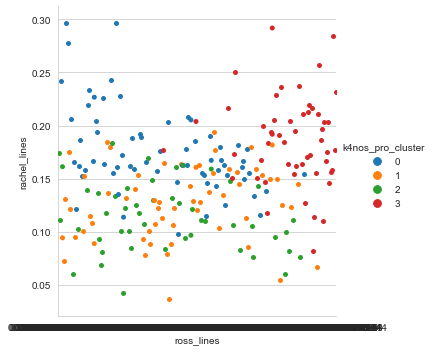

In [206]:
g=sns.catplot(x="ross_lines", y="rachel_lines", hue="k4nos_pro_cluster", kind="swarm", data=df_small)


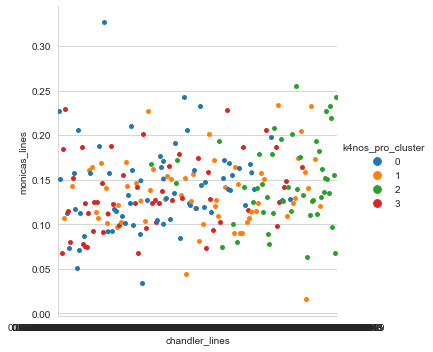

In [208]:
g=sns.catplot(x="chandler_lines", y="monicas_lines", hue="k4nos_pro_cluster", kind="swarm", data=df_small)


# Descriptive Statistics for Slide Visuals

In [225]:
print("Mean percentage of Ross lines in an episode:" + str(df_small['ross_lines'].mean()))
print("Mean percentage of Rachel lines in an episode:" + str(df_small['rachel_lines'].mean()))
print("Mean percentage of Chandler lines in an episode:" + str(df_small['chandler_lines'].mean()))
print("Mean percentage of Monica lines in an episode:" + str(df_small['monicas_lines'].mean()))
print("Mean percentage of Joey lines in an episode:" + str(df_small['joey_lines'].mean()))
print("Mean percentage of Phoebe lines in an episode:" + str(df_small['phoebe_lines'].mean()))

Mean percentage of Ross lines in an episode:0.14853090890557255
Mean percentage of Rachel lines in an episode:0.15248266143078512
Mean percentage of Chandler lines in an episode:0.13884265394203482
Mean percentage of Monica lines in an episode:0.13892095703411922
Mean percentage of Joey lines in an episode:0.13438662435931326
Mean percentage of Phoebe lines in an episode:0.12284376448412251


In [230]:
print("Mean Ratings: " + str(df_small['Rating'].mean()))
print("Mean Number of Views (in Millions): " + str(df_small['views'].mean()))
print("Mean Number of Reviews on IMDB: "  +str(df_small['number_of_reviews'].mean()))

Mean Ratings: 8.441919637832006
Mean Number of Views (in Millions): 25.033480176211462
Mean Number of Reviews on IMDB: 3389.2555066079294


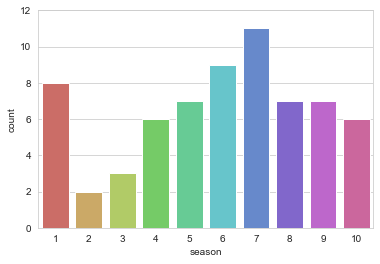

In [238]:
sns.countplot(x='season', data=df_k4p_0, palette='hls').set(ylim=(0, 12))
plt.show()

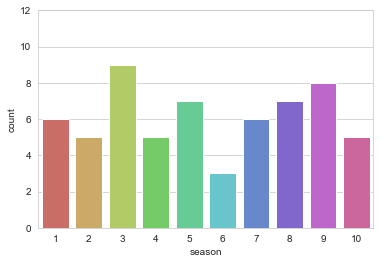

In [239]:
sns.countplot(x='season', data=df_k4p_1, palette='hls').set(ylim=(0, 12))
plt.show()

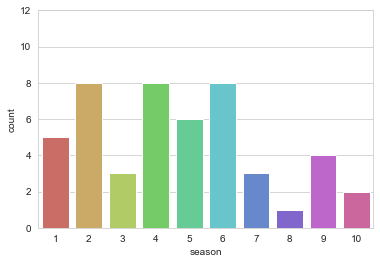

In [241]:
sns.countplot(x='season', data=df_k4p_2, palette='hls').set(ylim=(0, 12))
plt.show()

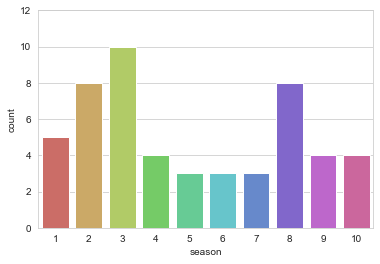

In [242]:
sns.countplot(x='season', data=df_k4p_3, palette='hls').set(ylim=(0, 12))
plt.show()

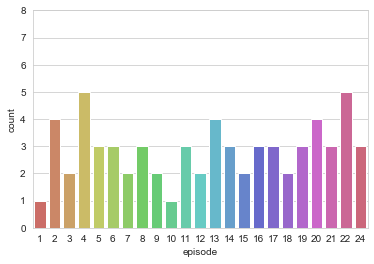

In [250]:
sns.countplot(x='episode', data=df_k4p_0, palette='hls').set(ylim=(0, 8))
plt.show()

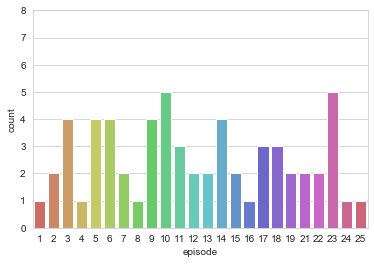

In [249]:
sns.countplot(x='episode', data=df_k4p_1, palette='hls').set(ylim=(0, 8))
plt.show()

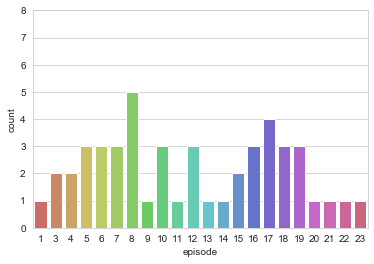

In [248]:
sns.countplot(x='episode', data=df_k4p_2, palette='hls').set(ylim=(0, 8))
plt.show()

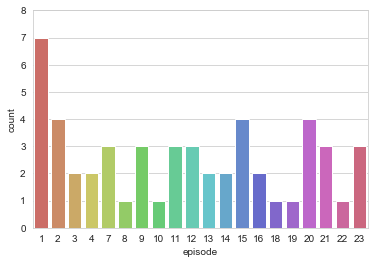

In [247]:
sns.countplot(x='episode', data=df_k4p_3, palette='hls').set(ylim=(0, 8))
plt.show()